In [34]:
from fastai.vision.all import *
from fastai.vision import models
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

In [5]:
path = 'data'

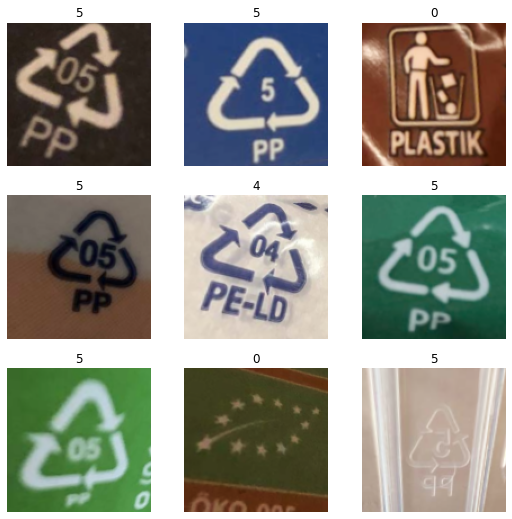

In [35]:
np.random.seed(42)
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(128), batch_tfms=aug_transforms(do_flip=False))
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/x/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0030199517495930195)

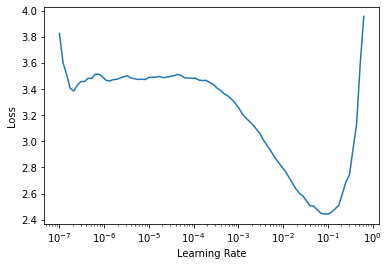

In [36]:
learn = cnn_learner(dls, models.resnet18, path=path, metrics=error_rate)
learn.lr_find()

In [37]:
learn.fit_one_cycle(16, max_lr=slice(1e-4, 1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,276.573883,1397.634644,0.890511,00:15
1,278.988434,380.998260,0.832117,00:15
2,276.982788,305.501801,0.846715,00:15
3,272.699646,286.759491,0.824818,00:15
4,266.468811,271.782715,0.824818,00:14
5,259.986145,259.275879,0.817518,00:14
6,253.255676,246.935303,0.832117,00:15
7,245.431900,238.517136,0.824818,00:14
8,240.453720,230.419907,0.832117,00:15
9,234.698898,223.978241,0.839416,00:14


In [38]:
learn.fit_one_cycle(50, max_lr=slice(1e-4, 1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,200.245468,214.424362,0.839416,00:15
1,201.838577,216.310699,0.832117,00:15
2,201.546829,213.681168,0.839416,00:14
3,200.336823,211.739136,0.839416,00:15
4,200.934326,208.745926,0.839416,00:15
5,199.333221,205.653336,0.839416,00:14
6,197.554535,199.626541,0.839416,00:14
7,197.380463,194.105438,0.832117,00:14
8,194.946472,187.429977,0.839416,00:14
9,192.624695,181.597443,0.839416,00:15


SuggestedLRs(lr_min=0.13182567358016967, lr_steep=2.2908675418875646e-06)

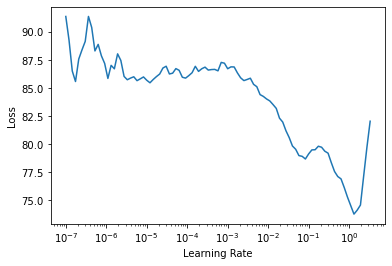

In [39]:
learn.lr_find()

In [40]:
learn.fit_one_cycle(50, max_lr=slice(1e-4, 1))

epoch,train_loss,valid_loss,error_rate,time
0,89.465950,62.987289,0.751825,00:15
1,87.606430,63.192669,0.759124,00:15
2,88.122322,62.774899,0.744526,00:15
3,88.090195,61.370716,0.751825,00:15
4,86.687073,61.065487,0.766423,00:15
5,86.327858,59.091843,0.773723,00:15
6,85.857841,55.655315,0.751825,00:15
7,84.697945,53.373737,0.729927,00:15
8,82.812775,50.789989,0.708029,00:15
9,81.646599,48.422371,0.708029,00:15


SuggestedLRs(lr_min=0.13182567358016967, lr_steep=6.309573450380412e-07)

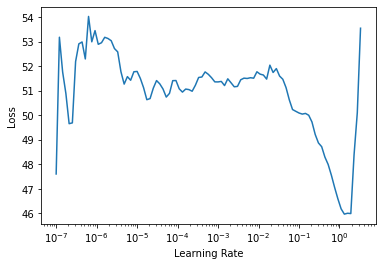

In [41]:
learn.lr_find()